## 21. Nonparametric Curve Estimation

In this Chapter we discuss the nonparametric estimation of probability density functions and regression functions, which we refer to a **curve estimation**.

In Chapter 8 we saw it is possible to consistently estimate a cumulative distribution function $F$ without making any assumptions about $F$.  If we want to estimate a probability density function $f(x)$ or a regression function $r(x) = \mathbb{E}(Y | X = x)$ the situation is different.  We cannot estimate these functions consistently without making some smoothness assumptions.  Correspondingly, we will perform some sort of smoothing operation with the data.

A simple example of a density estimator is a **histogram**.  To form a histogram estimator of a density $f$, we divide the  real line into disjoint sets called **bins**.  The histogram estimator is a piecewise constant function where the height of the function is proportional to the number of observations in each bin.  The number of bins is an example of a **smoothing parameter**.  If we smooth too much (large bins) we get a highly biased estimator while if smooth too little (small bins) we get a highly variable estimator.  Much of curve estimation is concerned with trying to optimally balance variance and bias.

### 21.1 The Bias-Variance Tradeoff

Let $g$ denote an unknown function and let $\hat{g}_n$ denote an estimator of $g$.  Bear in mind that $\hat{g}_n(x)$ is a random function evaluated at a point $x$; $\hat{g}_n$ is random because it depends on the data.  Indeed, we could be more explicit and write $\hat{g}_n(x) = h_x(X_1, \dots, X_n)$ to show that $\hat{g}_n(x)$ is a function of the data $X_1, \dots, X_n$ and that the function could be different for each $x$.

As a loss function, we will use the **integrated square error (ISE)**:

$$ L(g, \hat{g}_n) = \int (g(u) - \hat{g}_n(u))^2 du$$

The **risk** or **mean integrated square error (MISE)** is:

$$ R(g, \hat{g}) = \mathbb{E}\left(L(g, \hat{g}) \right) $$

**Lemma 21.1**.  The risk can be written as 

$$ R(g, \hat{g}) = \int b^2(x) dx + \int v(x) dx $$

where

$$ b(x) = \mathbb{E}(\hat{g}_n(x)) - g(x) $$

is the bias of $\hat{g}_n(x)$ at a fixed $x$ and

$$ v(x) = \mathbb{V}(\hat{g}_n(x)) = \mathbb{E}\left( \hat{g}_n(x) - \mathbb{E}(\hat{g}_n(x))^2\right) $$

is the variance of $\hat{g}_n(x)$ at a fixed $x$.

In summary,

$$ \text{RISK} = \text{BIAS}^2 + \text{VARIANCE} $$

When the data is over-smoothed, the bias term is large and the variance is small.  When the data are under-smoothed the opposite is true.  This is called the **bias-variance trade-off**.  Minimizing risk corresponds to balancing bias and variance.

### 21.2 Histograms

Let $X_1, \dots, X_n$ be IID on $[0, 1]$ with density $f$.   The restriction on $[0, 1]$is not crucial; we can always rescale the data to be on this interval.  Let $m$ be an integer and define bins

$$ B_1 = \left[0, \frac{1}{m} \right), B_2 = \left[\frac{1}{m}, \frac{2}{m} \right), \dots, B_m = \left[\frac{m - 1}{m}, 1 \right] $$

Define the **binwidth** $h = 1 / m$, let $v_j$ be the number of observations in $B_j$, let $\hat{p}_j = v_j / n$ and let $p_j = \int_{B_j} f(u) du$.

The **histogram estimator** is defined by 

$$
\hat{f}_n(x) = \begin{cases}
\hat{p}_1 / h & x \in B_1 \\
\hat{p}_2 / h & x \in B_2 \\
\vdots & \vdots\\
\hat{p}_m / h & x \in B_m
\end{cases}
$$

which we can write more succinctly as

$$ \hat{f}_n(x) = \sum_{j=1}^n \frac{\hat{p}_j}{h} I(x \in B_j) $$

To understand the motivation for this estimator, let $p_j = \int_{B_j} f(u) du$ and note that, for $x \in B_j$ and $h$ small,

$$ \hat{f}_n(x) = \frac{\hat{p}_j}{h} \approx \frac{p_j}{h} = \frac{\int_{B_j} f(u) du}{h} \approx \frac{f(x) h}{h} = f(x) $$

The mean and the variance of $\hat{f}_n(x)$ are given in the following Theorem.

**Theorem 21.3**.  Consider fixed $x$ and fixed $m$, and let $B_j$ be the bin containing $x$.  Then,

$$ 
\mathbb{E}(\hat{f}_n(x)) = \frac{p_j}{h} 
\quad \text{and} \quad
\mathbb{V}(\hat{f}_n(x)) = \frac{p_j (1 - p_j)}{nh^2}
$$

Let's take a closer look at the bias-variance tradeoff.  Consider some $x \in B_j$.  For any other $u \in B_j$,

$$ f(u) \approx f(x) + (u - x) f'(x) $$

and so

$$ 
\begin{align}
p_j = \int_{B_j} f(u) du &\approx \int_{B_j} (f(x) + (u - x) f'(x)) du \\
&= f(x) h + h f'(x) \left(h \left(j - \frac{1}{2} \right) - x \right)
\end{align}
$$

Therefore, the bias $b(x)$ is

$$
\begin{align}
b(x) &= \mathbb{E}(\hat{f}_n(x)) - f(x) = \frac{p_j}{h} - f(x) \\
&\approx \frac{f(x) h + h f'(x) \left(h \left(j - \frac{1}{2} \right) - x \right)}{h} - f(x) \\
&= f'(x) \left(h \left(j - \frac{1}{2} \right) - x \right)
\end{align}
$$

If $\overline{x}_j$ is the center of the bin, then

$$
\begin{align}
\int_{B_j} b^2(x) dx &= \int_{B_j} (f'(x))^2 \left(h \left(j - \frac{1}{2} \right) - x \right)^2 dx \\
&\approx (f'(\overline{x}_j))^2 \int_{B_j} \left(h \left(j - \frac{1}{2} \right) - x \right)^2 dx \\
&= (f'(\overline{x}_j))^2 \frac{h^3}{12}
\end{align}
$$

Therefore,

$$
\begin{align}
\int_0^1 b^2(x) dx &= \sum_{j=1}^m \int_{B_j} b^2(x) dx \approx \sum_{j=1}^m (f'(\overline{x}_j))^2 \frac{h^3}{12} \\
&= \frac{h^2}{12} \sum_{j=1}^m h(f'(\overline{x}_j))^2 \approx \frac{h^2}{12} \int_0^1 h(f'(\overline{x}_j))^2 dx
\end{align}
$$

Note that this increases as a function of $h$. 

Now consider the variance.  For $h$ small, $1 - p_j \approx 1$, so

$$
\begin{align}
v(x) &\approx \frac{p_j}{nh^2}\\
&= \frac{f(x)h + h f'(x)\left(h \left(j - \frac{1}{2} \right) - x \right)}{nh^2} \\
&\approx \frac{f(x)}{nh}
\end{align}
$$

when we keep the dominant term.  So

$$
\int_0^1 v(x) dx \approx \frac{1}{nh}
$$

Note that this decreases with $h$.  Putting this all together, we get:

**Theorem 21.4**.  Suppose that $\int (f'(u))^2 du < \infty$.  Then

$$ R(\hat{f}_n, f) \approx \frac{h^2}{12} \int (f'(u))^2 du + \frac{1}{nh}$$

The value $h^*$ that minimizes this expression is

$$ h^* = \frac{1}{n^{1/3}} \left( \frac{6}{\int (f'(u))^2 du} \right)^{1/3}$$

With this choice of binwidth,

$$ R(\hat{f}_n, f) \approx \frac{C}{n^{2/3}} $$

where $C = (3/4)^{2/3} \left( \int (f'(u))^2 du \right)^{1/3}$.

Theorem 21.4 is quite revealing.  We see that with an optimally chosen bandwidth, the MISE decreases to 0 at rate $n^{-2/3}$.  By comparison, most parametric estimators converge at rate $n^{-1}$.  The formula for optimal binwidth $h^*$ is of theoretical interest but it is not useful in practice since it depends on the unknown function $f$.

A practical way of choosing the binwidth is to estimate the risk function and minimize over $h$.  Recall that the loss function, which we now write as a function of $h$, is

$$
\begin{align}
L(h) &= \int \left( \hat{f}_n(x) - f(x) \right)^2 dx \\
&= \int \hat{f}_n^2(x) dx - 2 \int \hat{f}_n(x) f(x) dx + \int f^2(x) dx
\end{align}
$$

The last term does not depend on the binwidth $h$ so minimizing the risk is equivalent to minimizing the expected value of

$$ J(h) = \int \hat{f}_n^2(x) dx - 2 \int \hat{f}_n(x) f(x) dx $$

We shall refer to $\mathbb{E}(J(h))$ as the risk, although it differs from the true risk by the constant term $\int f^2(x) dx$.

The **cross-validation estimator of  risk** is

$$ \hat{J}(h) = \int \left( \hat{f}_n(x) \right)^2 dx - \frac{2}{n} \sum_{i=1}^n \hat{f}_{(-i)}(X_i)$$

where $\hat{f}_{(-i)}$ is the histogram estimator obtained after removing the $i$-th observation.  We refer to $\hat{J}(h)$ as the cross-validation score or estimated risk.

**Theorem 21.6**.  The cross-validation estimator is nearly unbiased:

$$ \mathbb{E}(\hat{J}(x)) \approx \mathbb{E}(J(x)) $$

In principle, we need to recompute the histogram $n$ times to compute $\hat{J}(x)$.  Moreover, this has to be done for all values of $h$.  Fortunately, there is a shortcut formula.

**Theorem 21.7**.  The following identity holds:

$$ \hat{J}(h) = \frac{2}{(n - 1)h} + \frac{n+1}{n-1} \sum_{j=1}^m \hat{p}_j^2 $$

Next we want some sort of confidence set for $f$.  Suppose $\hat{f}_n$ is a histogram with $m$ bins and binwidth $h = 1 / m$.  We cannot realistically make confidence statements about the fine details of true density $f$.  Instead, we make confidence statements about $f$ at the resolution of the histogram.  To this end, define

$$ \overline{f}(x) = \frac{p_j}{h} \quad \text{for } x \in B_j $$

where $p_j = \int_{B_j} f(u) du$ which is a "histogramized" version of $f$.

**Theorem 21.9**.  Let $m = m(n)$ be the number of bins in the histogram $\hat{f}_n$.  Assume that $m(n) \rightarrow \infty$ and $m(n) \log m / n \rightarrow 0$ as $n \rightarrow \infty$.  Define

$$
\ell(x) = \left( \text{max} \left\{\sqrt{\hat{f}_n(x)} - c, 0\right\} \right)^2
\quad \text{and} \quad
u(x) = \left(\sqrt{\hat{f}_n(x)} + c \right)^2
$$

where

$$
c = \frac{z_{\alpha / (2 m)}}{2} \sqrt{\frac{m}{n}}
$$

Then,

$$
\lim_{n \rightarrow \infty} \mathbb{P} \left( \ell(x) \leq \overline{f}(x) \leq u(x) \text{ for all } x \right) \geq 1 - \alpha
$$

**Proof**.  Here is an outline of the proof.  A rigorous proof requires fairly sophisticated tools.  From the central limit theorem, $\hat{p}_j \approx N\left(p_j, p_j (1 - p_j) / n\right)$.  By the delta method, $\sqrt{\hat{p}_j} \approx N\left(\sqrt{p_j}, 1 / (4n)\right)$.  Moreover, it can be shown that the $\sqrt{\hat{p}_j}$'s are approximately independent.  Therefore,

$$ 2 \sqrt{n} \left( \sqrt{\hat{p}_j} - \sqrt{p_j} \right) \approx Z_j $$

where $Z_1, \dots, Z_m \sim N(0, 1)$.  Let $A$ be the event that $\ell(x) \leq \overline{f}(x) \leq u(x)$ for all $x$.  So,

$$
\begin{align}
A &= \left\{ \ell(x) \leq \overline{f}(x) \leq u(x) \text{ for all } x \right\} \\
&= \left\{ \sqrt{\ell(x)} \leq \sqrt{\overline{f}(x)} \leq \sqrt{u(x)} \text{ for all } x \right\} \\
&= \left\{ \sqrt{\hat{f}_n(x)} - c \leq \sqrt{\overline{f}(x)} \leq \sqrt{\hat{f}_n(x)} + c \text{ for all } x \right\} \\
&= \left\{ \max_x \left| \sqrt{\hat{f}_n(x)} - \sqrt{\overline{f}(x)} \right| \leq c \right\}
\end{align}
$$

Therefore,

$$
\begin{align}
\mathbb{P}(A^c) &= \mathbb{P} \left( \max_x \left| \sqrt{\hat{f}_n(x)} - \sqrt{\overline{f}(x)} \right| > c\right)
= \mathbb{P} \left( \max_j \left| \sqrt{\frac{\hat{p}_j}{h}} - \sqrt{\frac{p_j}{h}} \right| > c\right) \\
&= \mathbb{P} \left( \max_j \left| \sqrt{\hat{p}_j} - \sqrt{p_j} \right| > c \sqrt{h} \right)
= \mathbb{P} \left( \max_j 2 \sqrt{n} \left| \sqrt{\hat{p}_j} - \sqrt{p_j} \right| > 2 c \sqrt{hn} \right) \\
&= \mathbb{P} \left( \max_j 2 \sqrt{n} \left| \sqrt{\hat{p}_j} - \sqrt{p_j} \right| > z_{\alpha / (2m)} \right) \\
&\approx \mathbb{P} \left( \max_j \left| Z_j \right| > z_{\alpha / (2m)} \right)
 \leq \sum_{j=1}^m \mathbb{P} \left( \max_j \left| Z_j \right| > z_{\alpha / (2m)} \right) \\
&= \sum_{j=1}^m \frac{\alpha}{m} = \alpha
\end{align}
$$

### 21.3 Kernel Density Estimation

Histograms are discontinuous.  **Kernel density estimators** are smoother and they converge faster to the true density than histograms.

Let $X_1, \dots, X_n$ denote the observed data, a sample from $f$.  In this chapter, a **kernel** is defined to be any smooth function $K$ such that $K(x) \geq 0$, $\int K(x) dx = 1$, $\int x K(x) dx = 0$ and $\sigma_K^2 \equiv \int x^2 K(x) dx > 0$.  Two examples of kernels are the **Epanechnikov kernel**

$$ K(x) = \begin{cases}
\frac{3}{4} \left(1 - x^2 / 5 \right) / \sqrt{5} & \text{if } |x| < \sqrt{5} \\
0 & \text{otherwise}
\end{cases}$$

and the Gaussian (Normal) kernel $K(x) = (2\pi)^{-1/2} e^{-x^2/2}$.

Given a kernel $K$ and a positive number $h$, called the **bandwidth**, the **kernel density estimator** is defined to be

$$ \hat{f}(x) = \frac{1}{n} \sum_{i=1}^n \frac{1}{h} K \left( \frac{x - X_i}{h} \right) $$

The kernel density estimator effectively puts a smoothed out lump of mass $1 / n$ over each data point $X_i$.  The bandwidth $h$ controls the amount of smoothing.  When $h$ is close to 0, $\hat{f}_n$ consists of a set of spikes, one at each data point.  The height of the spikes tends to infinity as $h \rightarrow 0$.  When $h \rightarrow 0$, $\hat{f}_n$ tends to a uniform density.

To construct a kernel density estimator, we need to choose a kernel $K$ and a bandwidth $h$.  It can be shown theoretically and empirically that the choice of $K$ is not crucial.  However, the choice of bandwidth $h$ is very important.  As with the histogram, we can make a theoretical statement about how the risk of the estimator depends on the bandwidth.

**Theorem 21.13**.  Under weak assumptions on $f$ and $K$,

$$ R(f, \hat{f}_n) \approx \frac{1}{4} \sigma_K^4 h^4 \int \left(f''(x)\right)^2 dx + \frac{\int K^2(x) dx}{nh} $$

where $\sigma_K^2 = \int x^2 K(x) dx$.  The optimal bandwidth is

$$ h^* = \frac{c_1^{-2/5} c_2^{1/5} c_3^{-1/5}}{n^{1/5}} $$

where $c_1 = \int x^2 K(x) dx$, $c_2 = \int K(x)^2 dx$ and $c_3 = \int \left( f''(x) \right)^2 dx$.  With this choice of bandwidth,

$$ R(f, \hat{f}_n) \approx \frac{c_4}{n^{4/5}} $$

for some constant $c_4 > 0$.

**Proof**.  Let

$$ K_h(x, X) = \frac{1}{h} K\left( \frac{x - X}{h} \right)
\quad \text{and} \quad
\hat{f}_n(x) = \frac{1}{n} \sum_{i=1}^n K_h(x, X_i)
$$

Thus, $$
\begin{align}
\mathbb{E}[\hat{f}_n(x)] &= \mathbb{E}[K_h(x, X)] \\
\mathbb{V}[\hat{f}_n(x)] &= \frac{1}{n} \mathbb{V}[K_h(x, X)]
\end{align}
$$

Now,

$$
\begin{align}
\mathbb{E}[K_h(x, X)] &= \int \frac{1}{h} K\left( \frac{x - t}{h} \right) f(t) dt \\
&= \int K(u) f(x - hu) du \\
&= \int K(u) \left[ f(x) - hu f'(x) + \frac{1}{2} h^2u^2 f''(x) + \dots \right] du \\
&= f(x) + \frac{1}{2} h^2 f''(x) \int u^2 K(u) du + \dots
\end{align}
$$

since $\int K(u) du = 1$ and $\int u K(u) du = 0$.  The bias is

$$ \mathbb{E}[K_h(x, X)] - f(x) \approx \frac{1}{2} \sigma_K^2 h^2 f''(x) $$

By a similar calculation,

$$ \mathbb{V}[\hat{f}_n(x)] \approx \frac{f(x) \int K^2(u) du}{n h_n} $$

The second result follows from integrating the bias squared plus variance.

We see that kernel estimators converge at rate $n^{-4/5}$ while histograms converge at rate $n^{-2/3}$.  It can be shown that, under weak assumptions, there does not exist a nonparametric estimator that converges faster than $n^{-4/5}$.

The expression for $h^*$ depends on the unknown density $f$ which makes the result of little practical use.  As with the histograms, we shall use cross-validation to find a bandwidth.  Thus, we estimate the risk (up to a constant) by

$$ \hat{J}(h) = \int \hat{f}^2(x) dx - 2 \frac{1}{n} \sum_{i=1}^n \hat{f}_{-i}(X_i) $$

where $\hat{f}_{-i}$ is the kernel density estimator after omitting the $i$-th observation.

**Theorem 21.14**.  For any $h > 0$,

$$ \mathbb{E} \left[ \hat{J}(h) \right] = \mathbb{E} \left[ J(h) \right] $$

Also,

$$ \hat{J}(h) \approx \frac{1}{hn^2}\sum_{i, j} K^* \left( \frac{X_i - X_j}{h} \right) + \frac{2}{nh} K(0) $$

where $K^*(x) = K^{(2)}(x) - 2 K(x)$ and $K^{(2)}(z) = \int K(z - y) K(y) dy$.  In particular, if $K$ is a $N(0, 1)$ Gaussian kernel then $K^{(2)}(z)$ is the $N(0, 2)$ density.

We then choose the bandwidth $h_n$ that maximizes $\hat{J}(h)$.  A justification for this method is given by the following remarkable theorem due to Stone.

**Theorem 21.15 (Stone's Theorem)**.  Suppose that $f$ is bounded.  Let $\hat{f}_h$ denote the kernel estimator with bandwidth $h$ and let $h_n$ denote the bandwidth chosen by cross-validation.  Then,

$$ \frac{\int \left( f(x) - \hat{f}_{h_n}(x)\right)^2 dx}{\inf_h \int \left( f(x) - \hat{f}_h(x) \right)^2 dx} \xrightarrow{\text{P}} 1$$

To construct confidence bands, we use something similar to histograms although the details are more complicated.  The version described here is from Chaudhuri and Marron (1999).

**Confidence Band for Kernel Density Estimator**

1. Choose an evenly spaced grid of points $\mathcal{V} = \{ v_1, \dots, v_N \}$.  For every $v \in \mathcal{V}$, define

$$ Y_i(v) = \frac{1}{h} K \left( \frac{v - X_i}{h} \right) $$

Note that $\hat{f}_n(v) = \overline{Y}_n(v)$, the average of the $Y_i(v)$'s.

2. Define

$$ \text{se}(v) = \frac{s(v)}{\sqrt{n}} $$

where $s^2(v) = (n - 1)^{-1} \sum_{i=1}^n ( Y_i(v) - \overline{Y}_n(v) )^2$.

3. Compute the effective sample size

$$ \text{ESS}(v) = \frac{\sum_{i=1}^n K\left( \frac{v - X_i}{h} \right)}{K(0)} $$

4. Let $\mathcal{V}^* = \left\{ v \in \mathcal{V} : \text{ESS}(v) \geq 5 \right\}$.  Now define the number of independent blocks $m$ by

$$ \frac{1}{m} = \frac{\overline{\text{ESS}}}{n} $$

where $\overline{\text{ESS}}$ is the average of $\text{ESS}$ over $\mathcal{V}^*$.

5.  Let 

$$ q = \Phi^{-1} \left( \frac{1 + (1 + \alpha)^{1/m}}{2} \right) $$

and define

$$ \ell(v) = \text{max} \left\{ \hat{f}_n(v) - q \cdot \text{se}(v), 0 \right\}
\quad \text{and} \quad
u(v) = \hat{f}_n(v) + q \cdot \text{se}(v)$$

Then,

$$ \mathbb{P} \Big\{ \ell(v) \leq f(v) \leq u(v) \text{ for all } v \Big\} \approx 1 - \alpha $$

Suppose now that the data $X_i = \{ X_{i1}, \dots, X_{id} \}$ are $d$-dimensional.  The kernel estimator can easily be generalized to $d$ dimensions.  Let $h = (h_1, \dots, h_d)$ be a vector of bandwidths and define

$$ \hat{f}_n(x) = \frac{1}{n} \sum_{i=1}^n K_h(x - X_i) $$

where

$$ K_h(x - X_i) = \frac{1}{n \prod_{j=1}^d h_j} \left\{ \prod_{j=1}^d K \left( \frac{x_i - X_{ij}}{h_j} \right) \right\} $$

For simplicity, we might take $h_j = s_j h$ where $s_j$ is the standard deviation of the $j$-th variable.  There is now only a single bandwidth to choose.  Using calculations like the ones in the one-dimensional case, the risk is given by

$$
R(f, \hat{f}_n) 
\approx \frac{1}{4} \sigma_K^4 \left[ \sum_{j=1}^d h_j^4 \int f_{jj}^2(x) dx + \sum_{j \neq k} h_j^2 h_k^2 \int f_{jj}(x) f_{kk}(x) dx \right] + \frac{\left( \int K^2(x) dx\right)^d}{n \prod_{j=1}^d h_j}
$$

where $f_{jj}$ is the second partial derivative of $f$.

The optimal bandwidth satisfies $h_i \approx c_1 n^{-1/(4 + d)}$ leading to a risk of order $n^{-4/(4+d)}$.  From this fact, we see that the risk increases quickly with dimension, a problem usually called the **curse of dimensionality**.  To get a sense of how serious this problem is, consider the following table from Silverman (1986) which shows the sample size required to ensure a relative mean squared error less than 0.1 at 0 when the density is a multivariate normal and the optimal bandwidth is selected.

| Dimension | Sample Size |
|-----------|-------------|
| 1         | 4           |
| 2         | 19          |
| 3         | 67          |
| 4         | 223         |
| 5         | 768         |
| 6         | 2790        |
| 7         | 10700       |
| 8         | 43700       |
| 9         | 187000      |
| 10        | 842000      |

This is bad news indeed.  it says that having 842,000 observations in a ten dimensional problem is really like having 4 observations.

### 21.4 Nonparametric Regression

Consider pairs of points $(x_1, Y_1), \dots, (x_n, Y_n)$ related by

$$ Y_i = r(x_i) + \epsilon_i $$

where $\mathbb{E}(\epsilon_i) = 0$ and we are treating the $x_i$'s as fixed.  In nonparametric regression, we want to estimate the regression function $r(x) = \mathbb{E}(Y | X = x)$.

There are many nonparametric regression estimators.  Most involve estimating $r(x)$ by taking some sort of weighted average of the $Y_i$'s, giving higher weight to those points near $x$.  In particular, the **Nadaraya-Watson kernel estimator** is defined by

$$ \hat{r}(x) = \sum_{i=1}^n w_i(x) Y_i$$

where the weights $w_i(x)$ are given by

$$ w_i(x) = \frac{K\left(\frac{x - x_i}{h}\right)}{\sum_{j=1}^n \left(\frac{x - x_j}{h}\right) } $$

The form of this estimators comes from first estimating the joint density $f(x, y)$ using kernel density estimation and then inserting this into:

$$ r(x) = \mathbb{E}(Y | X = x) = \int y f(y | x) dy = \frac{\int y f(x, y) dy}{\int f(x, y) dy} $$

**Theorem 21.19**.  Suppose that $\mathbb{V}(\epsilon_i) = \sigma^2$.  The risk of the Nadaraya-Watson kernel estimator is

$$ R(\hat{r}_n, r) \approx \frac{h^4}{4} 
\left( \int x^2 K^2(x) dx\right)^4
\int \left( r''(x) + 2 r'(x) \frac{f'(x)}{f(x)} \right)^2 dx
+ \int \frac{\sigma^2 \int K^2(x) dx}{nh f(x)} dx
$$

The optimal bandwidth decreases at rate $n^{-1/5}$ and with this choice the risk decreases at rate $n^{-4/5}$.

In practice, to choose the bandwidth $h$ we minimize the cross-validation score

$$ \hat{J}(h) = \sum_{i=1}^n (Y_i - \hat{r}_{-i}(x_i))^2$$ 

where $\hat{r}_{-i}$ is the estimator we get by omitting the $i$-th variable.  An approximation to $\hat{J}$ is given by

$$ \hat{J}(h) \approx \sum_{i=1}^n (Y_i - \hat{r}(x_i))^2 \left( 1 - \frac{K(0)}{\sum_{j=1}^n K \left( \frac{x_i - x_j}{h} \right)} \right)^{-2}$$

The procedure for finding confidence bands is similar to that for density estimation.  However, we first need to estimate $\sigma^2$.  Suppose that the $x_i$'s are ordered.  Assuming $r(x)$ is smooth, we have $r(x_{i+1}) - r(x) \approx 0$ and hence

$$Y_{i+1} - Y_i = \left[ r(x_{i+1} + \epsilon_{i+1} \right] - \left[ r(x_{i} + \epsilon_{i} \right] \approx \epsilon_{i+1} - \epsilon_i $$

and hence

$$ \mathbb{V}(Y_{i+1} - Y_i) \approx \mathbb{V}(\epsilon_{i+1} - \epsilon{i}) = \mathbb{V}(\epsilon_{i+1}) + \mathbb{V}(\epsilon_i) = 2\sigma^2$$

We can thus use the average of the differences of consecutive $Y_i$'s to estimate $\sigma^2$.  Define

$$ \hat{\sigma}^2 = \frac{1}{2(n - 1)} \sum_{i=1}^{n-1} (Y_{i+1} - Y_i)^2$$

**Confidence Bands for Kernel Regression**

Follow the same procedure as for kernel density estimation, except change the defition of the standard error $\text{se}(v)$ to

$$ \text{se}(v) = \hat{\sigma} \sqrt{\sum_{i=1}^n w^2(x_i)} $$

The extension to multiple regressors $X = (X_1, \dots, X_p)$ is straightforward.  As with kernel density estimation we just replace the kernel with a multivariate kernel.  However, the same caveats about the curse of dimensionality apply.

In some cases, we may consider putting some restrictions on the regression function which will then reduce the curse of dimensionality.  For example, **additive regression** is based on the model

$$ Y = \sum_{j=1}^p r_j(X_j) + \epsilon$$

Now we only need to fit $p$ one-dimensional functions.  The model can be enriched by adding various interactions, for example

$$ Y = \sum_{j=1}^p r_j(X_j) + \sum_{j < k} r_{jk}(X_j X_k) + \epsilon$$

Additive models are usually fit by an algorithm called **backfitting**.

**Backfitting**

1. Initialize $r_1(x_1), \dots, r_p(x_p)$.
2. For $j = 1, \dots, p$:
  - Let $\epsilon_i = Y_i - \sum_{s \neq j} r_s(x_i)$   
  - Let $r_j$ be the function estimate obtained by regressing the $\epsilon_i$'s on the $j$-th covariate.
3.  If converged, stop.  Otherwise, go back to step 2.

Additive models have the advantage that they avoid the curse of dimensionality and they can be fit quickly but they have one disadvantage:  the model is not fully nonparametric.  In other words, the true regression function $r(x)$ may not be of the fitted form.

### 21.5  Appendix:  Confidence Sets and Bias

The confidence bands we computed are for the smoothed function, rather than the density function or regression function.  For example, the confidence band for a kernel density estimate with bandwidth $h$ is a band for the function one gets by smoothing the true function with a kernel with the same bandwidth.  Getting a confidence band for the true function is complicated for reasons we now explain.

First, let's review the parametric case.  When estimating a scalar quantity $\theta$ with an estimator $\hat{\theta}$, the usual confidence interval is of the form $\hat{\theta} \pm z_{\alpha / 2} s_n$, where $\hat{\theta}$ is the maximum likelihood estimator and $s_n = \sqrt{\mathbb{V}(\hat{\theta})}$ is the estimated standard error of the estimator.  Under standard regularity conditions, $\hat{\theta} \approx N(\theta, s_n)$ and

$$ \lim_{n \rightarrow \infty} \mathbb{P} \left( \hat{\theta} - z_{\alpha / 2} s_n \leq \theta \leq \hat{\theta} + z_{\alpha / 2} s_n \right) = 1 - \alpha $$

But let's take a closer look.

Let $b_n = \mathbb{E}(\hat{\theta}_n) - \theta$.  This is a bias term we usually ignore in large sample calculations, but let's keep track of it; $\hat{\theta} \approx N(\theta + b_n, s_n)$.  The coverage of the usual confidence interval is

$$
\begin{align}
\mathbb{P}\left(\hat{\theta} - z_{\alpha / 2} s_n \leq \theta \leq \hat{\theta} + z_{\alpha / 2} s_n \right)
&= \mathbb{P}\left(- z_{\alpha / 2}  \leq \frac{\theta - \hat{\theta}}{s_n} \leq z_{\alpha / 2}\right) \\
&= \mathbb{P}\left(- z_{\alpha / 2}  \leq \frac{N(b_n, s_n)}{s_n} \leq z_{\alpha / 2}\right) \\
&= \mathbb{P}\left(- z_{\alpha / 2}  \leq N\left(\frac{b_n}{s_n}, 1\right) \leq z_{\alpha / 2}\right)
\end{align}
$$

In a well-behaved parametric model, $s_n$ is of size $n^{-1/2}$ and $b_n$ is of size $n^{-1}$.  Hence, $b_n / s_n \rightarrow 0$ and the last probability statement becomes $\mathbb{P}\left(- z_{\alpha / 2}  \leq N\left(0, 1\right) \leq z_{\alpha / 2}\right) = 1 - \alpha$.  What makes parametric confidence intervals have the right coverage is the fact that $b_n / s_n \rightarrow 0$.

The situation is more complicated for kernel methods.  Consider estimating a density $f(x)$ at a single point $x$ with a kernel density estimator.  Since $\hat{f}(x)$ is a sum of iid random variables, the central limit theorem implies that

$$ \hat{f}(x) \approx N \left( f(x) + b_n(x), \frac{c_2 f(x)}{nh} \right) $$

where 

$$ b_n(x) = \frac{1}{2} h^2 f''(x) c_1 $$

is the bias, $c_1 = \int x^2 K(x) dx$, and $c_2 = \int K^2(x) dx$.  The estimated standard error is

$$ s_n(x) = \left\{ \frac{c_2 \hat{f}(x)}{nh} \right\}^{1/2} $$

Suppose we use the usual interval $\hat{f}(x) \pm z_{\alpha/2} s_n(x)$.  Arguing as before, the coverage is approximately

$$ \mathbb{P}\left(-z_{\alpha/2} \leq N\left(\frac{b_n(x)}{s_n(x)}, 1\right) \leq z_{\alpha/2} \right) $$

The optimal bandwidth is of the form $h^* = cn^{-1/5}$ for some constant $c$.  if we plug $h = cn^{-1/5}$ into the definitions of $b_n(x)$ and $s_n(x)$ we see that $b_n(x) / s_n(x)$ does not tend to 0.  Thus, the confidence interval will have coverage less than $1 - \alpha$.

### 21.7 Exercises

**Exercise 21.7.1**.  Let $X_1, \dots, X_n \sim f$ and let $\hat{f}_n$ be the kernel density estimator using the boxcar kernel:

$$ K(x) = \begin{cases}
1 & \text{if } -\frac{1}{2} < x < \frac{1}{2} \\
0 & \text{otherwise}
\end{cases}$$

**(a)**  Show that

$$\mathbb{E}(\hat{f}(x)) = \frac{1}{h} \int_{x-(h/2)}^{x+(h/2)} f(y) dy$$

and

$$\mathbb{V}(\hat{f}(x)) = \frac{1}{nh^2} \left[ \int_{x-(h/2)}^{x+(h/2)} f(y) dy  - \left( \int_{x-(h/2)}^{x+(h/2)} f(y) dy \right)^2\right]$$

**(b)** Show that if $h \rightarrow 0$ and $nh \rightarrow \infty$ as $n \rightarrow \infty$ then $f_n(x) \xrightarrow{\text{P}} f(x)$.

**Solution**.

**(a)**  We have:

$$ \hat{f}(x) = \frac{1}{n} \sum_{i=1}^n \frac{1}{h} K\left( \frac{x - X_i}{h} \right) = \frac{1}{n} \sum_{i=1}^n K_h(x, X_i)$$

where $K_h(x, X_i) = \frac{1}{h} K\left( \frac{x - X_i}{h} \right)$.  Also note that the kernel only assumes values 0 or 1, so $K_h^2(x, X_i) = \frac{1}{h} K_h(x, X_i)$.

Then

$$
\begin{align}
\mathbb{E}[K_h(x, X)] &= \int \frac{1}{h} K\left( \frac{x - t}{h} \right) f(t) dt \\
&= \frac{1}{h} \int I \left(t - \frac{h}{2} < x < t + \frac{h}{2} \right) f(t) dt \\
&= \frac{1}{h} \int_{x - (h/2)}^{x + (h/2)} f(t) dt
\end{align}
$$

$$
\begin{align}
\mathbb{V}[K_h(x, X)] &= \mathbb{E}[K_h^2(x, X)] - \mathbb{E}[K_h(x, X)]^2 \\
&= \frac{1}{h} \mathbb{E}[K_h(x, X)] - \mathbb{E}[K_h(x, X)]^2 \\
&= \frac{1}{h} \left(\frac{1}{h} \int_{x - (h/2)}^{x + (h/2)} f(t) dt - \left(\frac{1}{h} \int_{x - (h/2)}^{x + (h/2)} f(t) dt \right)^2 \right)
\end{align}
$$

therefore 

$$\mathbb{E}(\hat{f}(x)) = \mathbb{E} \left( \frac{1}{n} \sum_{i=1}^n K_h(x, X) \right) = \frac{1}{n} \sum_{i=1}^n  \mathbb{E} \left( K_h(x, X)  \right) = \frac{1}{h} \int_{x - (h/2)}^{x + (h/2)} f(y) dy $$

$$\mathbb{V}(\hat{f}(x)) = \frac{1}{n} \mathbb{V}[K_h(x, X)] = \frac{1}{nh^2} \left[ \int_{x-(h/2)}^{x+(h/2)} f(y) dy  - \left( \int_{x-(h/2)}^{x+(h/2)} f(y) dy \right)^2\right] $$

**(b)**  From theorem 21.13, the risk in approximating with this kernel is

$$ R(f, \hat{f}_n) \approx \frac{1}{4} \sigma_K^4 h^4 \int (f''(x))^2 dx + \frac{\int K^2(x)dx}{nh} $$

where $\sigma_K^2 = \int x^2 K(x) dx = \int_{-1/2}^{1/2} x^2 dx = 1/12$, and $\int K^2(x) dx = \int_{-1/2}^{1/2} dx = 1$.  As $h \rightarrow 0$ and $nh \rightarrow \infty$, the first term goes to 0 and the second term also goes to 0, so the risk goes to 0.

But

$$ R(f, \hat{f}_n) = \int b^2(x) dx + \int v(x) dx $$

and since the risk goes to 0, both integrals (which are non-negative) go to 0:

$$ b^2(x) = (\mathbb{E}(\hat{f}_n(x) - f(x)))^2 \rightarrow 0$$

$$ v(x) = \mathbb{V}(\hat{f}_n(x) - f(x)) \rightarrow 0$$

So $\mathbb{E}((\hat{f}_n(x) - f(x))^2) = v(x) - b^2(x) \rightarrow 0$, which implies convergence in quadratic means -- which implies convergence in probability.

**Exercise 21.7.2**.  Get the data on fragments of glass collected in forensic work.  You need to download the MASS library for R then:

```
library(MASS)
data(fgl)
x <- fgl[[1]]
help(fgl)
```

The data are also on my website.  Estimate the density of the first variable (refractive index) using a histogram and use a kernel density estimator. Use cross-validation to choose the amount of smoothing.  Experiment with different binwidths and bandwidths.  Comment on the similarities and differences.  Construct 95% confidence bands for your estimators.

**Solution**.

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('data/glass.txt', delim_whitespace=True)
X = data['RI']

Let's use the estimated risks to select a histogram number of bins and a KDE bandwidth.

Histogram estimated risk:

$$ \hat{J}(h) = \frac{2}{(n - 1)h} + \frac{n+1}{n-1} \sum_{j=1}^m \hat{p}_j^2 $$

In [2]:
from itertools import product
from scipy.stats import norm


def rescale(X):
    """
    Return X rescaled between 0 and 1
    """
    X_min, X_max = X.min(), X.max()
    if X_max == X_min:
        return X - X_min
    return (X - X_min) / (X_max - X_min)


def j_hat_histogram(X, m):
    """
    Calculate the approximated estimated histogram risk J_hat:
    
       \hat{J}(h) = \frac{2}{(n - 1)h} + \frac{n + 1}{n - 1} \sum_{j=1}^m \hat{p}_j^2
    
    where:
      n is the dataset size
      m is the number of bins
      h is the binwidth for the rescaled [0, 1] dataset
      \hat{p}_j^2 is the number of elements in the $j$-th bin
    """
    n = len(X)
    h = 1 / m
    xx = rescale(X)
    phat = np.array([np.sum(np.where((j / m <= xx) & (xx < (j + 1) / m), 1, 0)) for j in range(m)])
    phat[-1] += np.sum(np.where(xx == 1, 1, 0))
    phat = phat / n
    return 2 / ((n - 1) * h) + (n + 1) / (n - 1) * np.sum(phat **2)

KDE estimated risk:

$$ \hat{J}(h) = \frac{1}{hn^2}\sum_{i, j} K^* \left( \frac{X_i - X_j}{h} \right) + \frac{2}{nh} K(0) $$

In [3]:
def j_hat_kde(X, h):
    """
    Calculate the approximated estimated KDE risk J_hat for a N(0, 1) Gaussian kernel
    
      \hat{J}(h) = \frac{1}{hn^2}\sum_{i, j} K^* \left( \frac{X_i - X_j}{h} \right) + \frac{2}{nh} K(0)
      
    where:
      n is the dataset size
      h is the binwidth for the rescaled [0, 1] dataset
      K^* is K^{(2)}(x) - 2 K(x), and K^{(2)} is the convolved kernel, K^{(2)}(z) = \int K(z - y) K(y) dy
      K is the original kernel
    """
    n = len(X)
    Kstar_args = np.array([X.iloc[i] - X.iloc[j] for i, j in product(range(n), range(n))]) / h
    sum_value = np.sum(norm.pdf(Kstar_args) - 2 * norm.pdf(Kstar_args))
    return sum_value / (h * n * n) + 2 * norm.pdf(0) / (n * h)

Histogram confidence bands (theorem 21.9):

$$
\ell(x) = \left( \text{max} \left\{\sqrt{\hat{f}_n(x)} - c, 0\right\} \right)^2
\quad \text{and} \quad
u(x) = \left(\sqrt{\hat{f}_n(x)} + c \right)^2
$$

where

$$
c = \frac{z_{\alpha / (2 m)}}{2} \sqrt{\frac{m}{n}}
$$

In [4]:
def create_histogram(X, m, alpha):
    n = len(X)
    X_min, X_max = X.min(), X.max()
    xx = rescale(X)
    phat = np.array([np.sum(np.where((j / m <= xx) & (xx < (j + 1) / m), 1, 0)) for j in range(m)])
    phat[-1] += np.sum(np.where(xx == 1, 1, 0))
    z = norm.ppf(1 - alpha / (2 * m))
    c = z * np.sqrt(m / n) / 2
    
    def get_bin(t):
        return np.maximum(np.minimum(np.floor(m * (t - X_min) / (X_max - X_min)).astype(int), m - 1), 0)
    
    def get_values(t):
        x = np.where((t >= X_min) & (t <= X_max), phat[get_bin(t)], 0)
        lower = (np.maximum(np.sqrt(x) - c, 0))**2
        upper = (np.sqrt(x) + c)**2
        return x, lower, upper
    
    return get_values

KDE confidence bands:

1. Choose an evenly spaced grid of points $\mathcal{V} = \{ v_1, \dots, v_N \}$.  For every $v \in \mathcal{V}$, define

$$ Y_i(v) = \frac{1}{h} K \left( \frac{v - X_i}{h} \right) $$

Note that $\hat{f}_n(v) = \overline{Y}_n(v)$, the average of the $Y_i(v)$'s.

2. Define

$$ \text{se}(v) = \frac{s(v)}{\sqrt{n}} $$

where $s^2(v) = (n - 1)^{-1} \sum_{i=1}^n ( Y_i(v) - \overline{Y}_n(v) )^2$.

3. Compute the effective sample size

$$ \text{ESS}(v) = \frac{\sum_{i=1}^n K\left( \frac{v - X_i}{h} \right)}{K(0)} $$

4. Let $\mathcal{V}^* = \left\{ v \in \mathcal{V} : \text{ESS}(v) \geq 5 \right\}$.  Now define the number of independent blocks $m$ by

$$ \frac{1}{m} = \frac{\overline{\text{ESS}}}{n} $$

where $\overline{\text{ESS}}$ is the average of $\text{ESS}$ over $\mathcal{V}^*$.

5.  Let 

$$ q = \Phi^{-1} \left( \frac{1 + (1 + \alpha)^{1/m}}{2} \right) $$

and define

$$ \ell(v) = \text{max} \left\{ \hat{f}_n(v) - q \cdot \text{se}(v), 0 \right\}
\quad \text{and} \quad
u(v) = \hat{f}_n(v) + q \cdot \text{se}(v)$$

In [5]:
def create_kde(X, bandwidth, alpha):
    n = len(X)
    
    def get_x(t):
        XX = np.repeat(X.to_numpy().reshape(-1, 1), len(t), axis=1)
        tt = np.repeat(t.reshape(1, -1), n, axis=0)
        return np.sum(norm.pdf((tt - XX) / bandwidth), axis=0) / (n * bandwidth)
    
    def get_se_q(V):
        XX = np.repeat(X.to_numpy().reshape(-1, 1), len(V), axis=1)
        VV = np.repeat(V.reshape(1, -1), n, axis=0)
        Y = norm.pdf((VV - XX) / bandwidth) / bandwidth
        s2_V = ((Y - Y.mean(axis=0))**2).sum(axis=0) / (n - 1)
        se_V = np.sqrt(s2_V / n)

        ESS = Y.sum(axis=0) * bandwidth / norm.pdf(0)
        ESS_bar = ESS[np.where(ESS >= 5)].mean()

        q = norm.ppf((1 + (1 - alpha)**(ESS_bar / n)) / 2)
    
        return se_V, q
    
    def get_values(t):
        x = get_x(t)
        se_V, q = get_se_q(t)
        lower = np.maximum(x - q * se_V, 0)
        upper = x + q * se_V
        
        return x, lower, upper
        
    return get_values

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate and plot estimated risk for various numbers of bins
m_values = [m for m in range(1, 101)]
j_hat = [j_hat_histogram(X, m) for m in m_values]

best_m = m_values[np.argmin(j_hat)]
best_risk = min(j_hat)

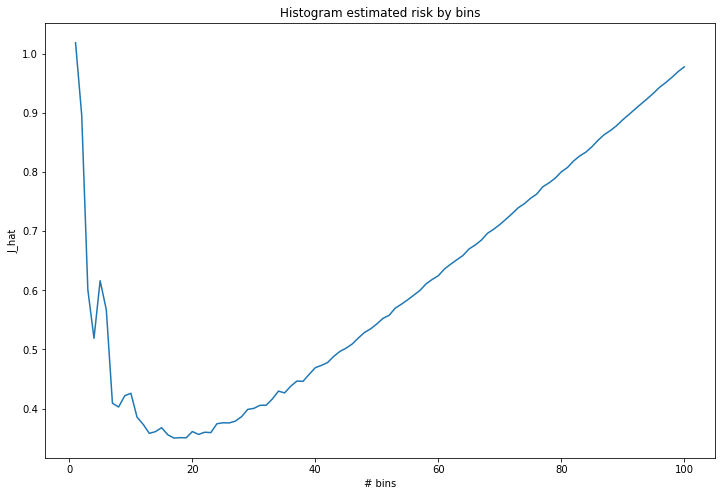

Best number of bins:	17
Risk with 17 bins: 	0.350


In [7]:
plt.figure(figsize=(12, 8))
plt.plot(m_values, j_hat)
plt.xlabel('# bins')
plt.ylabel('J_hat')
plt.title('Histogram estimated risk by bins')
plt.show()

print('Best number of bins:\t%i' % best_m)
print('Risk with %i bins: \t%.3f' % (best_m, best_risk))

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# Calculate and plot estimated risk for various bandwidths
h_values = [m / 20 for m in range(1, 21)]
j_hat = [j_hat_kde(X, h) for h in h_values]

In [9]:
# Find bandwidth that minimizes risk
# Using scipy rather than extensive search, since we are looking over a continuous interval

from scipy.optimize import minimize

res = minimize(fun = lambda h: j_hat_kde(X, h), x0 = 0.2, options={'maxiter': 10})

best_h = res.x[0]
best_risk = res.fun

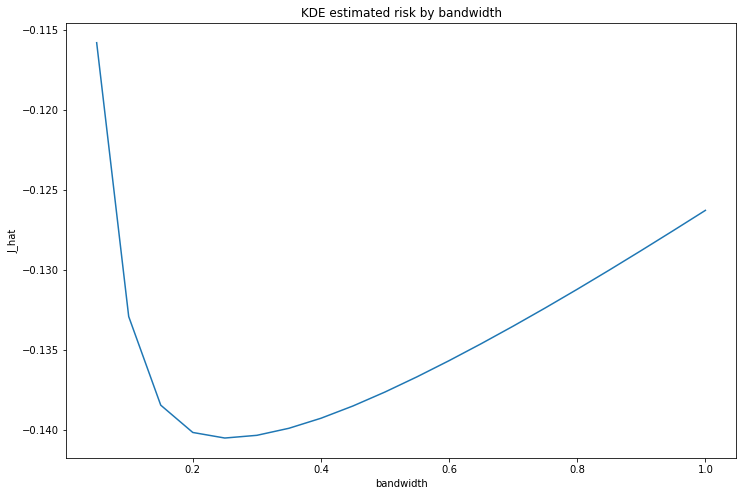

Best bandwidth:	0.252
Risk with selected bandwidth: 	-0.141


In [10]:
plt.figure(figsize=(12, 8))
plt.plot(h_values, j_hat)
plt.xlabel('bandwidth')
plt.ylabel('J_hat')
plt.title('KDE estimated risk by bandwidth')
plt.show()

print('Best bandwidth:\t%.3f' % best_h)
print('Risk with selected bandwidth: \t%.3f' % best_risk)

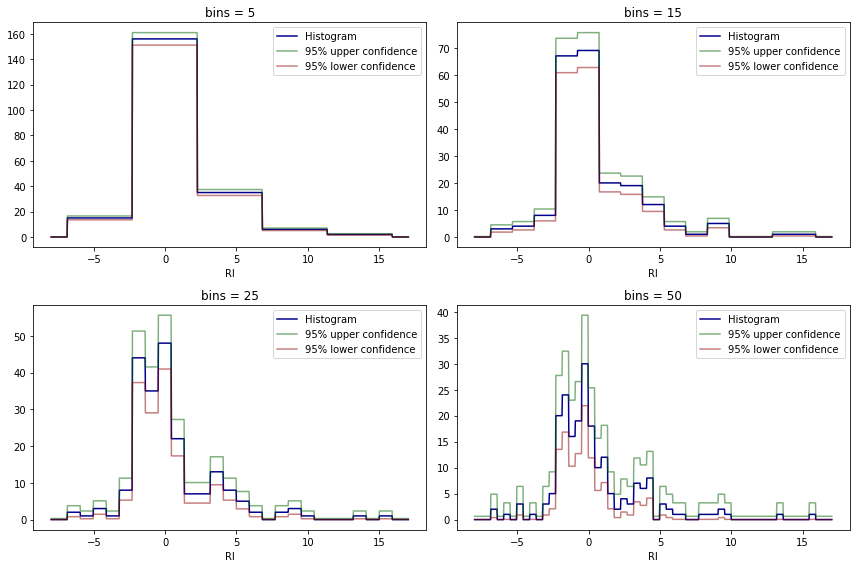

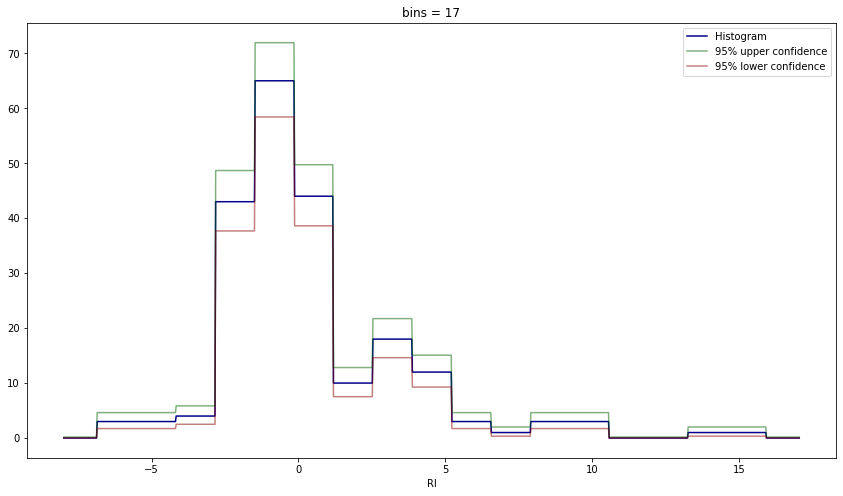

In [11]:
def plot_histogram(X, bins, ax):
    X_min, X_max = X.min(), X.max()
    x_plot_vals = np.arange(X_min - 0.05 * (X_max - X_min), X_max + 0.05 * (X_max - X_min), step=(X_max - X_min)/1000)
    
    # Draw the plot
    hist_vals, lower_vals, upper_vals = create_histogram(X, m=bins, alpha=0.05)(x_plot_vals)
    ax.plot(x_plot_vals, hist_vals, color='darkblue', label='Histogram')
    ax.plot(x_plot_vals, upper_vals, color='darkgreen', alpha=0.5, label='95% upper confidence')
    ax.plot(x_plot_vals, lower_vals, color='darkred', alpha=0.5, label='95% lower confidence')
    ax.legend()
    
    # Title and labels
    ax.set_title('bins = %d' % bins)
    ax.set_xlabel('RI')

    
# Show 4 different bin counts
plt.figure(figsize=(12, 8))
for i, bins in enumerate([5, 15, 25, 50]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    plot_histogram(X, bins, ax)

plt.tight_layout()
plt.show()

# Best risk
plt.figure(figsize=(14.5, 8))
plot_histogram(X, bins=17, ax=plt.gca())
plt.show()

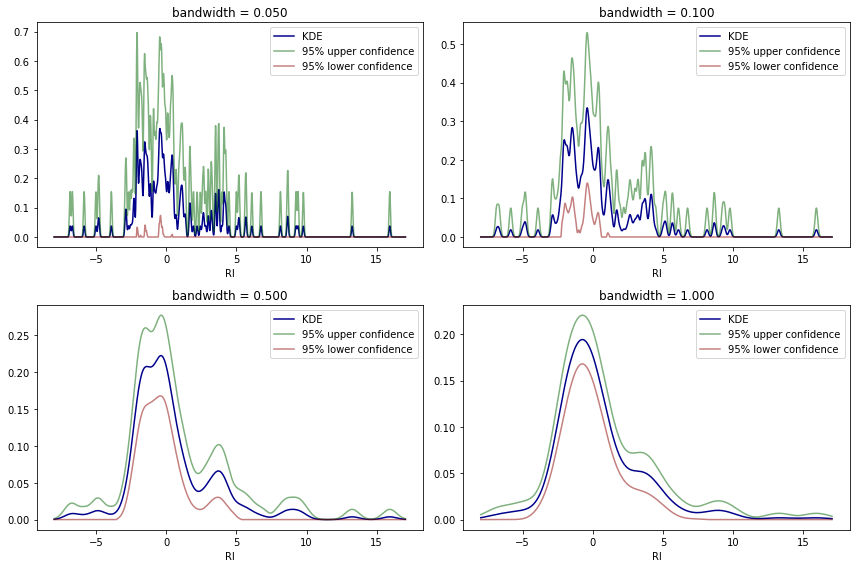

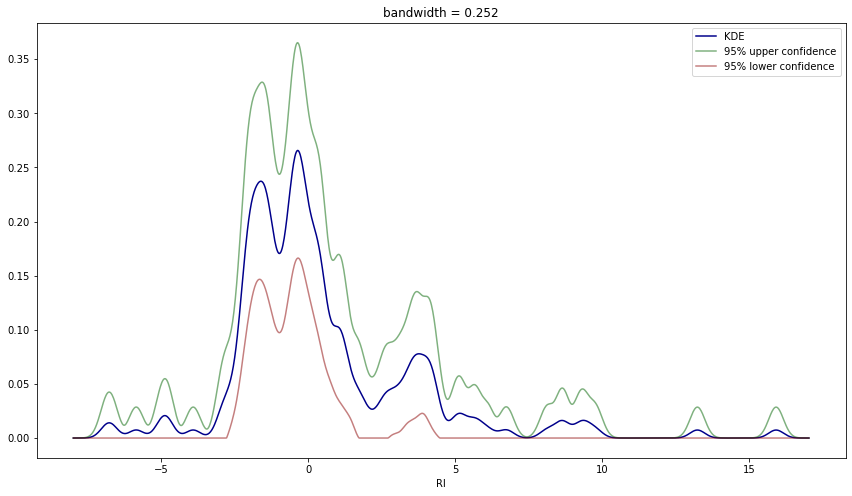

In [12]:
def plot_kde(X, bandwidth, ax):
    X_min, X_max = X.min(), X.max()
    x_plot_vals = np.arange(X_min - 0.05 * (X_max - X_min), X_max + 0.05 * (X_max - X_min), step=(X_max - X_min)/1000)
      
    # Draw the plot
    kde_vals, lower_vals, upper_vals = create_kde(X, bandwidth=bandwidth, alpha=0.05)(x_plot_vals)
    ax.plot(x_plot_vals, kde_vals, color='darkblue', label='KDE')
    ax.plot(x_plot_vals, upper_vals, color='darkgreen', alpha=0.5, label='95% upper confidence')
    ax.plot(x_plot_vals, lower_vals, color='darkred', alpha=0.5, label='95% lower confidence')
    ax.legend()
    
    # Title and labels
    ax.set_title('bandwidth = %.3f' % bandwidth)
    ax.set_xlabel('RI')    

# Show 4 different bandwidths
plt.figure(figsize=(12, 8))
for i, bandwidth in enumerate([0.05, 0.1, 0.5, 1.0]):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    plot_kde(X, bandwidth, ax)

plt.tight_layout()
plt.show()

# Best risk
plt.figure(figsize=(14.5, 8))
plot_kde(X, bandwidth=best_h, ax=plt.gca())
plt.show()

In both scenarios the risk estimates helped choose a hyperparameter for the estimator that produces a convincing and visually pleasing result for the estimate.

The confidence bands in both examples make it clear that the confidence bands are around the **smoothed function** rather than the true distribution function itself -- there is not a clear relation between confidence bands for distinct bin sizes, in histograms, or bandwidths, for KDEs.

**Exercise 21.7.3**.  Consider the data from question 2.  Let $Y$ be the refractive index and let $x$ be the aluminium content (the fourth variable).  Do a nonparametric regression to fit the model $Y = f(x) + \epsilon$.  Use cross-validation to estimate the bandwidth.  Construct 95% confidence bands for your estimate.

**Solution**.